<a href="https://colab.research.google.com/github/YigitBCesur/Finance-and-Trading/blob/main/Correlation_between_Commodities_Indexes_Treasure_VIX_BitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CORRELATION

*   Correlation measures association , but does not show if x causes y, vice versa
*   Correlation is a stat that measures degree to which two variables move in relation to each other.
*   In Finance , the correlation can measure the movement of a stock with that of a benchmark index , such as the SP500

In [1]:
!pip install yfinance

In [2]:
import numpy as np
import datetime as dt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
start= '2018-01-01'
end=dt.datetime.now()
#end= '2023-01-31'
tickers=['BTC-USD', '^GSPC', 'CL=F','GC=F' ,"^DJI", "^TNX", "^FVX", "^VIX"]
veri=(yf.download(tickers,start,end , interval='1wk')['Close']).round(2)
veri

[*********************100%***********************]  8 of 8 completed


Ticker,BTC-USD,CL=F,GC=F,^DJI,^FVX,^GSPC,^TNX,^VIX
Date,,,,,,,,
2018-01-01,16477.60,61.44,1320.3,25295.87,2.29,2743.15,2.48,9.22
2018-01-08,13772.00,64.30,1333.4,25803.19,2.35,2786.24,2.55,10.16
2018-01-15,11600.10,63.37,1331.9,26071.72,2.44,2810.30,2.64,11.27
2018-01-22,11786.30,66.14,1351.6,26616.71,2.47,2872.87,2.66,11.08
2018-01-29,8277.01,65.45,1333.7,25520.96,2.60,2762.13,2.85,17.31
...,...,...,...,...,...,...,...,...
2024-12-09,104298.70,71.29,2656.0,43828.06,4.25,6051.09,4.40,13.81
2024-12-16,95104.94,69.46,2628.7,42840.26,4.38,5930.85,4.52,18.36
2024-12-23,93530.23,70.60,2617.2,42992.21,4.46,5970.84,4.62,15.95


In [4]:
veri=veri.rename(columns={"BTC-USD": "Bitcoin", "CL=F": "OIL", "GC=F": "GOLD", "^DJI": "DOW","^GSPC": "SP500","^TNX": "TrY10Y", "^FVX":"TrY5Y", "^VIX":"Fear"})
veri

Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,16477.60,61.44,1320.3,25295.87,2.29,2743.15,2.48,9.22
2018-01-08,13772.00,64.30,1333.4,25803.19,2.35,2786.24,2.55,10.16
2018-01-15,11600.10,63.37,1331.9,26071.72,2.44,2810.30,2.64,11.27
2018-01-22,11786.30,66.14,1351.6,26616.71,2.47,2872.87,2.66,11.08
2018-01-29,8277.01,65.45,1333.7,25520.96,2.60,2762.13,2.85,17.31
...,...,...,...,...,...,...,...,...
2024-12-09,104298.70,71.29,2656.0,43828.06,4.25,6051.09,4.40,13.81
2024-12-16,95104.94,69.46,2628.7,42840.26,4.38,5930.85,4.52,18.36
2024-12-23,93530.23,70.60,2617.2,42992.21,4.46,5970.84,4.62,15.95


<Axes: xlabel='Date'>

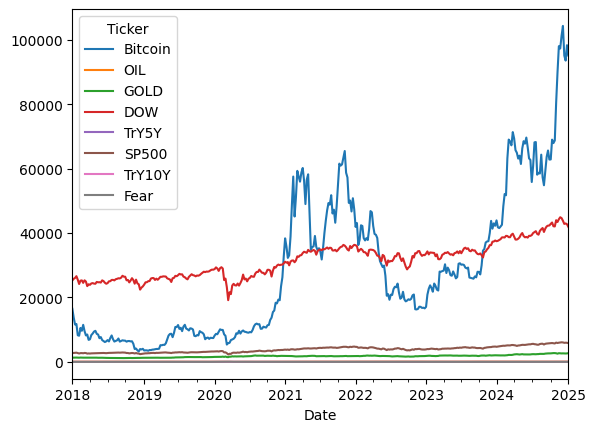

In [5]:
veri.plot.line()

In [6]:
#@title Default percentage of Change
veri/veri.shift()

Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,0.835801,1.046549,1.009922,1.020055,1.026201,1.015708,1.028226,1.101952
2018-01-15,0.842296,0.985537,0.998875,1.010407,1.038298,1.008635,1.035294,1.109252
2018-01-22,1.016052,1.043712,1.014791,1.020903,1.012295,1.022265,1.007576,0.983141
2018-01-29,0.702257,0.989568,0.986756,0.958832,1.052632,0.961453,1.071429,1.562274
...,...,...,...,...,...,...,...,...
2024-12-09,1.030253,1.060863,1.006594,0.981756,1.054591,0.993567,1.060241,1.081441
2024-12-16,0.911852,0.974330,0.989721,0.977462,1.030588,0.980129,1.027273,1.329471
2024-12-23,0.983442,1.016412,0.995625,1.003547,1.018265,1.006743,1.022124,0.868736


### Normalization

In [7]:
#@title ### apply the maximum absolute scaling in Pandas using the .abs() and .max() methods

def maximum_absolute_scaling(veri):
    # copy the dataframe
    veri_scaled = veri.copy()
    # apply maximum absolute scaling
    for column in veri_scaled.columns:
        veri_scaled = veri_scaled / veri_scaled.abs().max()
    return veri_scaled

# call the maximum_absolute_scaling function
veri_scaled = maximum_absolute_scaling(veri)

veri_scaled

Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,0.157985,0.509157,0.481703,0.563249,0.471193,0.450415,0.504065,0.139612
2018-01-08,0.132044,0.532858,0.486483,0.574545,0.483539,0.457490,0.518293,0.153846
2018-01-15,0.111220,0.525151,0.485935,0.580524,0.502058,0.461441,0.536585,0.170654
2018-01-22,0.113005,0.548106,0.493123,0.592659,0.508230,0.471715,0.540650,0.167777
2018-01-29,0.079359,0.542388,0.486592,0.568261,0.534979,0.453532,0.579268,0.262114
...,...,...,...,...,...,...,...,...
2024-12-09,1.000000,0.590785,0.969025,0.975895,0.874486,0.993567,0.894309,0.209116
2024-12-16,0.911852,0.575619,0.959065,0.953900,0.901235,0.973824,0.918699,0.278013
2024-12-23,0.896754,0.585067,0.954869,0.957283,0.917695,0.980390,0.939024,0.241520


<Axes: xlabel='Date'>

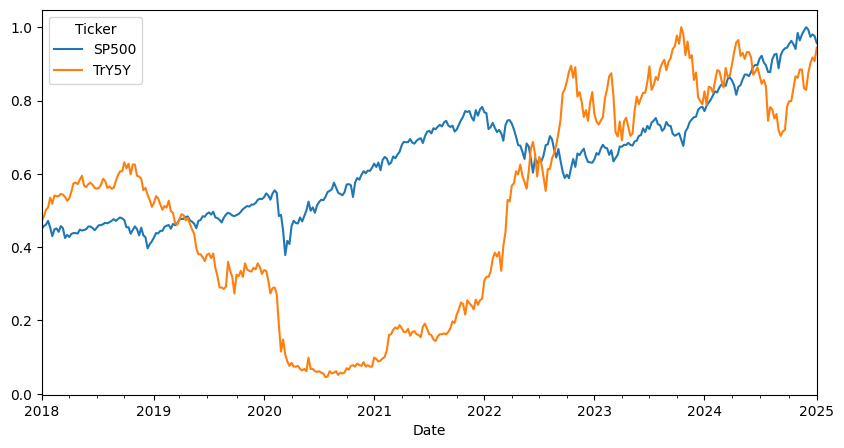

In [8]:
veri_scaled[["SP500","TrY5Y"]].plot(kind='line', figsize=(10, 5))

In [9]:
#@title Standardization
veri_standard = (veri - veri.mean()) / veri.std()
veri_standard

Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,-0.528722,-0.380977,-1.234732,-1.135187,-0.134144,-1.205105,-0.139673,-1.386374
2018-01-08,-0.647795,-0.221244,-1.198915,-1.041798,-0.091316,-1.158768,-0.082133,-1.259981
2018-01-15,-0.743380,-0.273185,-1.203016,-0.992366,-0.027074,-1.132896,-0.008153,-1.110729
2018-01-22,-0.735185,-0.118479,-1.149154,-0.892043,-0.005660,-1.065612,0.008287,-1.136277
2018-01-29,-0.889629,-0.157016,-1.198094,-1.093752,0.087134,-1.184695,0.164468,-0.298584
...,...,...,...,...,...,...,...,...
2024-12-09,3.336277,0.169151,2.417244,2.276274,1.264908,2.352057,1.438574,-0.769198
2024-12-16,2.931661,0.066945,2.342602,2.094437,1.357702,2.222758,1.537214,-0.157400
2024-12-23,2.862358,0.130614,2.311160,2.122409,1.414806,2.265760,1.619415,-0.481451


<Axes: xlabel='Date'>

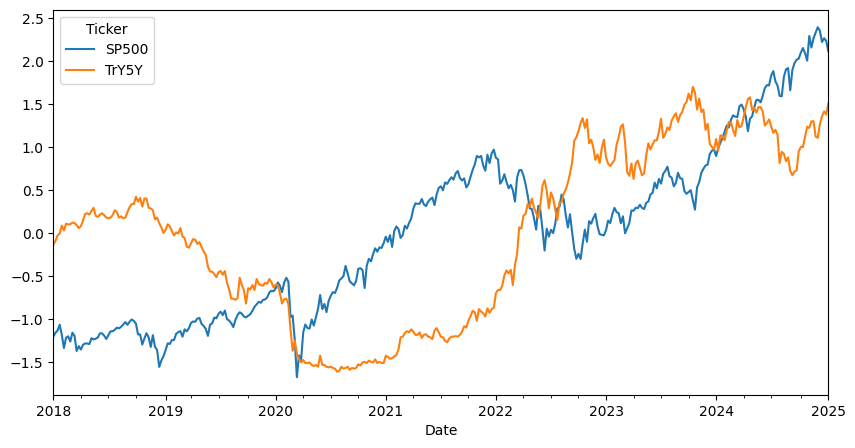

In [10]:
veri_standard[["SP500","TrY5Y"]].plot(kind='line', figsize=(10, 5))

### Log Return

In [11]:
#@title Default comparing each one with Log Return

veri_log_returns=np.log(veri/veri.shift())
veri_log_returns

Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,-0.179364,0.045499,0.009873,0.019857,0.025864,0.015586,0.027835,0.097083
2018-01-15,-0.171624,-0.014569,-0.001126,0.010353,0.037583,0.008598,0.034686,0.103686
2018-01-22,0.015924,0.042783,0.014683,0.020688,0.012220,0.022020,0.007547,-0.017003
2018-01-29,-0.353456,-0.010487,-0.013332,-0.042039,0.051293,-0.039309,0.068993,0.446143
...,...,...,...,...,...,...,...,...
2024-12-09,0.029804,0.059083,0.006573,-0.018413,0.053153,-0.006454,0.058496,0.078294
2024-12-16,-0.092278,-0.026005,-0.010332,-0.022796,0.030130,-0.020071,0.026907,0.284781
2024-12-23,-0.016696,0.016279,-0.004384,0.003541,0.018100,0.006720,0.021883,-0.140716


<Axes: xlabel='Date'>

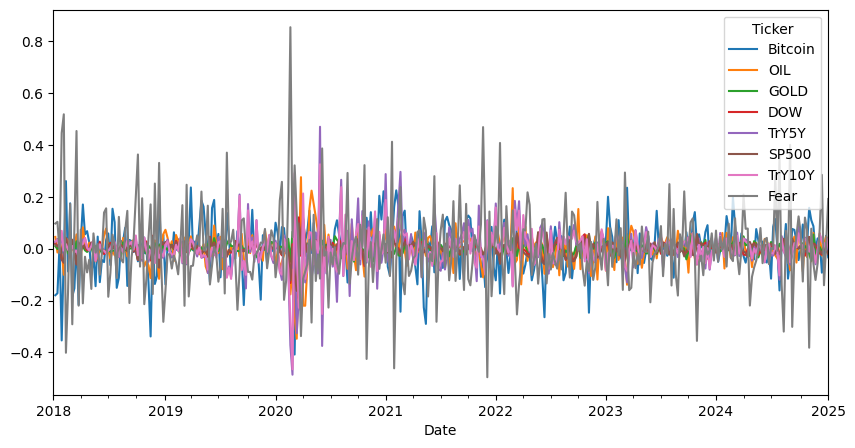

In [12]:
veri_log_returns.plot(kind='line', figsize=(10, 5))

<Axes: xlabel='Date'>

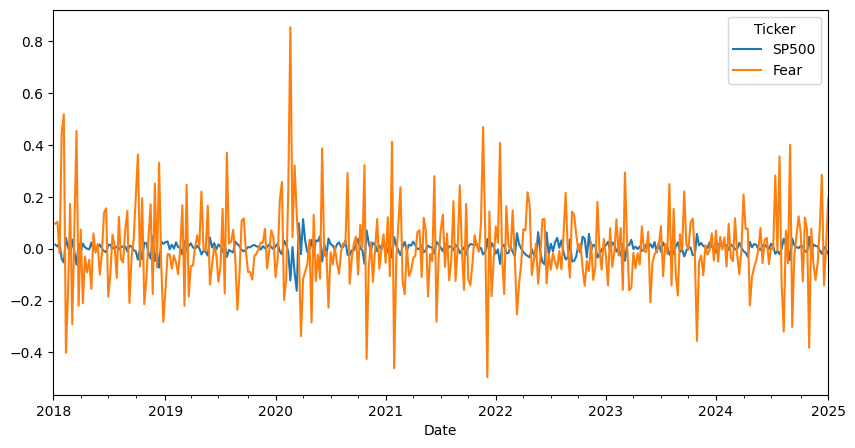

In [13]:
veri_log_returns[["SP500","Fear"]].plot(kind='line', figsize=(10, 5))

# Let's calculate CORRELATION


In [14]:
veri_corr=(veri_log_returns.corr()).round(2)
veri_corr

Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Ticker,,,,,,,,
Bitcoin,1.00,0.17,0.14,0.21,0.01,0.23,0.02,-0.26
OIL,0.17,1.00,0.17,0.32,0.20,0.31,0.11,-0.30
GOLD,0.14,0.17,1.00,0.25,-0.35,0.25,-0.34,-0.09
DOW,0.21,0.32,0.25,1.00,0.18,0.95,0.12,-0.68
TrY5Y,0.01,0.20,-0.35,0.18,1.00,0.14,0.89,-0.15
SP500,0.23,0.31,0.25,0.95,0.14,1.00,0.10,-0.72
TrY10Y,0.02,0.11,-0.34,0.12,0.89,0.10,1.00,-0.16
Fear,-0.26,-0.30,-0.09,-0.68,-0.15,-0.72,-0.16,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

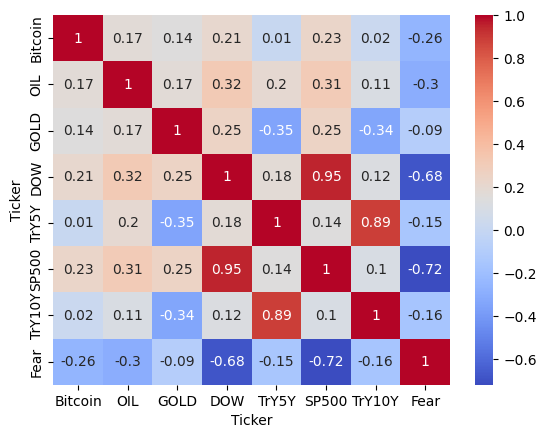

In [15]:
sns.heatmap(veri_corr, annot=True , cmap="coolwarm" , cbar=True)
plt.show

In [16]:
#@title Yeni ticker eklemek ve test correlation yapmak
def test_correlation(ticker):
    df=yf.download(ticker,start )['Close']
    logret=veri_log_returns.copy()
    logret[ticker]=np.log(df/df.shift())
    return logret.corr()
#test_correlation()

In [17]:
test_correlation(['ETH-USD', '^GSPC', 'GBTC'])

[*********************100%***********************]  3 of 3 completed


Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear,ETH-USD,^GSPC,GBTC
Ticker,,,,,,,,,,,
Bitcoin,1.000000,0.171660,0.144693,0.207967,0.006590,0.227262,0.017022,-0.260369,0.364876,NaN,NaN
OIL,0.171660,1.000000,0.169637,0.317720,0.202235,0.306938,0.114183,-0.298974,0.092078,NaN,NaN
GOLD,0.144693,0.169637,1.000000,0.253551,-0.346071,0.253885,-0.336699,-0.086310,0.144301,NaN,NaN
DOW,0.207967,0.317720,0.253551,1.000000,0.176910,0.952537,0.124194,-0.679998,0.173602,NaN,NaN
TrY5Y,0.006590,0.202235,-0.346071,0.176910,1.000000,0.137181,0.892981,-0.149665,0.038918,NaN,NaN
SP500,0.227262,0.306938,0.253885,0.952537,0.137181,1.000000,0.095728,-0.724845,0.181333,NaN,NaN
TrY10Y,0.017022,0.114183,-0.336699,0.124194,0.892981,0.095728,1.000000,-0.162059,0.029251,NaN,NaN
Fear,-0.260369,-0.298974,-0.086310,-0.679998,-0.149665,-0.724845,-0.162059,1.000000,-0.109088,NaN,NaN
ETH-USD,0.364876,0.092078,0.144301,0.173602,0.038918,0.181333,0.029251,-0.109088,1.000000,NaN,NaN


In [18]:
test_correlation('GBTC')

[*********************100%***********************]  1 of 1 completed


Ticker,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear,GBTC
Ticker,,,,,,,,,
Bitcoin,1.000000,0.171660,0.144693,0.207967,0.006590,0.227262,0.017022,-0.260369,0.384524
OIL,0.171660,1.000000,0.169637,0.317720,0.202235,0.306938,0.114183,-0.298974,0.118184
GOLD,0.144693,0.169637,1.000000,0.253551,-0.346071,0.253885,-0.336699,-0.086310,0.204067
DOW,0.207967,0.317720,0.253551,1.000000,0.176910,0.952537,0.124194,-0.679998,0.158224
TrY5Y,0.006590,0.202235,-0.346071,0.176910,1.000000,0.137181,0.892981,-0.149665,0.017959
SP500,0.227262,0.306938,0.253885,0.952537,0.137181,1.000000,0.095728,-0.724845,0.162788
TrY10Y,0.017022,0.114183,-0.336699,0.124194,0.892981,0.095728,1.000000,-0.162059,-0.009938
Fear,-0.260369,-0.298974,-0.086310,-0.679998,-0.149665,-0.724845,-0.162059,1.000000,-0.040081
GBTC,0.384524,0.118184,0.204067,0.158224,0.017959,0.162788,-0.009938,-0.040081,1.000000


In [22]:
#@title Visualize Correlation
def visualize_correlation(ticker1, ticker2):
    df=yf.download([ticker1, ticker2],start )
    df=df['Close']
    df=df/df.iloc[0]
    fig, ax=plt.subplots()
    df.plot(ax=ax)

#visualize_correlation()

[*********************100%***********************]  2 of 2 completed


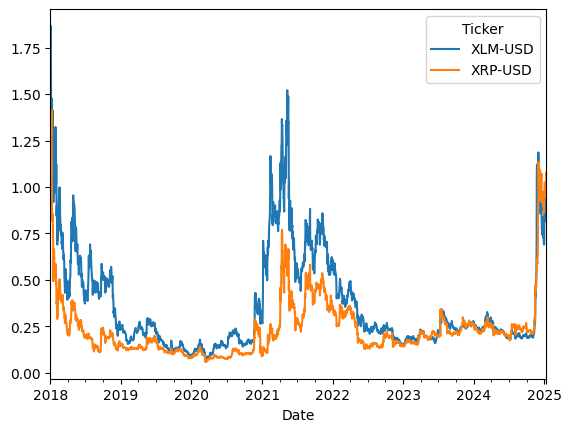

In [23]:
visualize_correlation('XRP-USD', 'XLM-USD' )

[*********************100%***********************]  2 of 2 completed


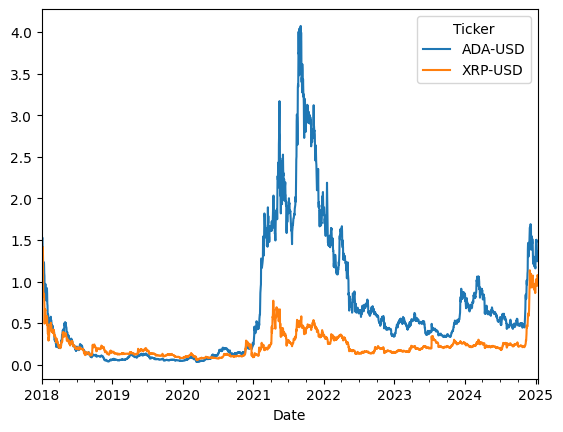

In [24]:
visualize_correlation('XRP-USD', 'ADA-USD')

[*********************100%***********************]  2 of 2 completed


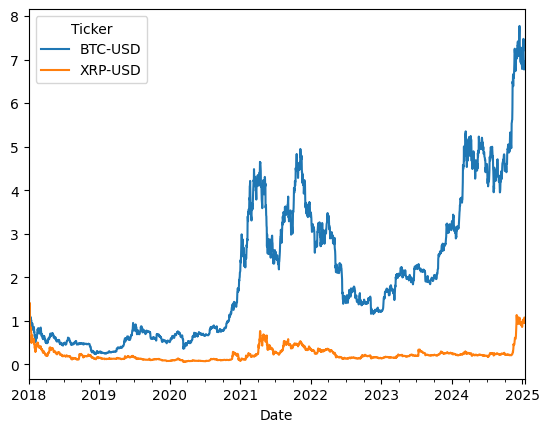

In [25]:
visualize_correlation('XRP-USD', 'BTC-USD')